# Description
This is the analysis of the chlorophyll fluorometer by taking measurements of chlorophyll standards via rhodamine dye. These tests serve as an analysis of the fluorometer's functionality for future testing.

# Fluormeter Testing
## Fluormeter Design
This fluorometer is a benchtop model with housing which positions the LED and the AS7341 at a 90-degree angle as well as will be an opaque design as to eliminate any ambient light from impacting the measurements. The AS7341 is fitted with a red filter Rocsculux filter #19. This filter had a 20% transmission. The top of the benchtop design contains a hole that fits a cuvette. A cuvette is placed into the fluorometer with the water sample to begin testing. Design materials can be found at: https://github.com/COAST-Lab/Chlorophyll-Fluorometer-/tree/main/Firmware.


# Testing Procedure
## Step 1
A YSI instrument was calibrated to be used to verify the chlorophyll water sample which would be prepared. Calibration information: https://www.ysi.com/file%20library/documents/manuals/exo-user-manual-web.pdf

## Step 2
A water sample was prepared with a chlorophyll concentration of 6.5mg/L and an RFU of 15.8 RFU. This water sample was prepared with rhodamine dye and DI water

## Chlorophyll Sample Preparation
### Step 1
5mL of Rhodamine dye was pipetted into a 1000mL volumetric flask or beaker. Fill the flask or beaker up to 1000mL mark with DI water

### Step 2
Pipette 5mL of the prepared solution in step 1 into a separate 1000mL volumetric flask or beaker. Fill this flask or beaker up to 1000mL mark with DI water. This will be your chlorophyll water sample

### Step 3
Verify the concentration of the prepared chlorophyll water sample with the YSI

## Step 4
## Dillution Preparation
Preapre an 80% (5.2mg/L), 60% (3.9mg/L), 40% (2.6mg/L), adn 20% (1.3mg/L) dillutuion solutions of the chlorphyll water sample. 

## Step 5
Insert fill an empty cuvette with the 6.5 mg/L solutuion. Insert the curvette into the sensor. Cover the sensor with the carboard box and run the code with the LED light on for one minute. 

## Step 6 
Stop the reading and take out the curvette. Repeat this process with the 80%, 60%, 40% and 20% dillution solutions. 

## Step 7
After all of the dillutuion solutions have been tested, stop testing and take the SD card out of the fluorometer and plug it into the computer to begin analysis of the data collected.

## Step 8
This test will be performed first with an LED intensity of 255 and a AS73411 gain of 512x and an ATIME of 59 and ASTEP of 599 and then repeated with a gain of 64x. The data is recorded onto the SD card in the microcontroller. 

# Data Analysis

## Graphing
When taking measurements the AS7341 light sensor collects light measurements of multiple wavelengths. The wavelength of 680nm (denoted as F8) will be analyzed.

## Graph characteristics
Each graph shows the catagories of '6.5 mg/L', '5.2 mg/L', '3.9 mg/L', '2.6 mg/L' and '1.3 mg/L' on the x-axis to denote each test. And the numerical value of the F8 light measurement on the y-axis. The mean of each category will be plotted with an error bar with extends from the lowest value of the data set to the largest.

#### Step 1 
import necessary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Step 2 
import file type (.csv file), convert F8 values to numeric, and specify the test values  

In [5]:
# Replace with the actual file path
file_path = "/Users/jessiewynne/chla_fluorometer/AS7341_Sample_tests/chl_sample_AS7341_Gain_64x.csv"

# df = pd.read_csv(file_path, encoding='utf-8', skiprows=[1])
# print(df.columns.tolist())

# Skip the rows with duplicate headers while reading the CSV file
df = pd.read_csv(file_path, encoding='utf-8', skiprows=[1])

# # Access the 'seconds' column
Seconds_values = df['Seconds'][1:]
df['Seconds'] = pd.to_numeric(df['Seconds'], errors='coerce')
# Access the 'F8 (Raw)' column
df = df.groupby('Test').apply(lambda group: group.iloc[1:]).reset_index(drop=True)
f8_raw_values = df['F8 (Raw)'][1:]

# Convert to numeric
f8_raw_values = pd.to_numeric(f8_raw_values, errors='coerce').dropna()
x_axis = df['Seconds']

# Get unique test categories from the 'Test' column
categories = df['Test'].unique()
categories = [category for category in categories if category.lower() != 'test']  # Remove 'test' from the categories

# Create a dictionary to store the 'F8 (Raw)' values for each category
category_f8_raw_dict = {}

#### Step 3 
calculate mean, minimum and maximum for each F8 measurement as well as the positive and
negative errors

In [6]:
for category in categories:
    category_f8_raw_dict[category] = f8_raw_values[df['Test'] == category]

# Calculate the mean, minimum, and maximum for each category for 'F8 (Raw)' data
category_f8_raw_means = np.array([np.mean(f8_raw_vals) for f8_raw_vals in category_f8_raw_dict.values()])
category_f8_raw_mins = np.array([np.min(f8_raw_vals) for f8_raw_vals in category_f8_raw_dict.values()])
category_f8_raw_maxs = np.array([np.max(f8_raw_vals) for f8_raw_vals in category_f8_raw_dict.values()])

# Calculate the positive and negative errors for 'F8 (Raw)' data
yerr_pos_f8_raw = np.abs(category_f8_raw_maxs - category_f8_raw_means)
yerr_neg_f8_raw = np.abs(category_f8_raw_means - category_f8_raw_mins)

#### Step 4
plot, create a scatter plot based he F8 measurement, label the y axis as F8, and the X axis as the sample catagories. Title the graph to denote the data being analyzed

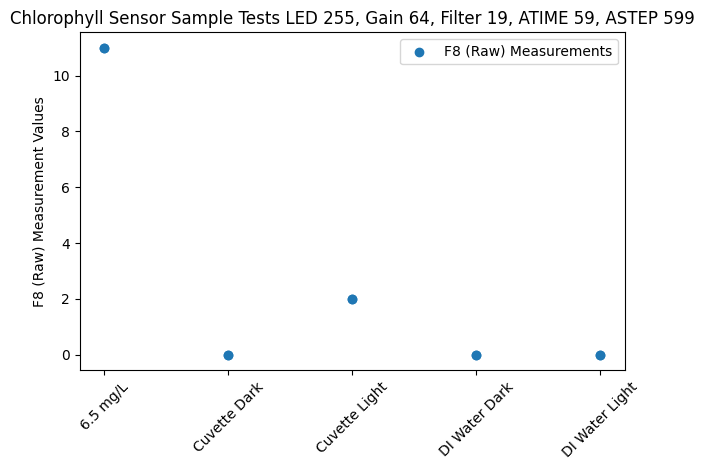

In [7]:
# Prepare data for scatter plot
x_data = np.arange(len(categories))

# Scatter plot for 'F8 (Raw)' values
plt.scatter(x_data, category_f8_raw_means, label='F8 (Raw) Measurements')
plt.errorbar(x_data, category_f8_raw_means, yerr=[yerr_neg_f8_raw, yerr_pos_f8_raw], fmt='o', capsize=3, ecolor='black')

plt.ylabel('F8 (Raw) Measurement Values')
plt.title("Chlorophyll Sensor Sample Tests LED 255, Gain 64, Filter 19, ATIME 59, ASTEP 599")

plt.xticks(x_data, labels=categories, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()